# Rotor Dynamics - Rigid Rotor Model
    
        Reference: Intelligent Motorized Spindle Technology by Y. Wu and L. Zhang

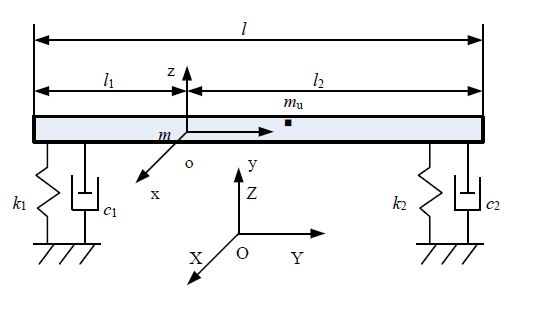

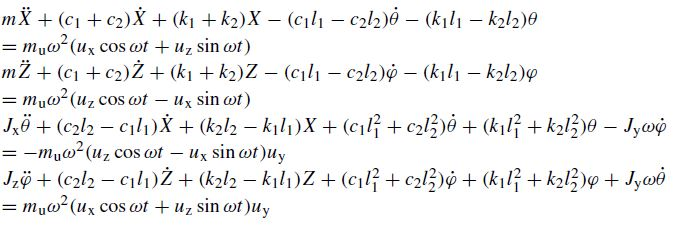

### We will be solving the above set of equations using State-Space Method.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

### Input Parameters

In [2]:
mass_shaft = 2.5                 # Mass in kg
mass_imbalance = 0.050           # Mass Imbalance in kg
RPM = 300                        # Speed of Shaft in RPM
omega = RPM *(2*np.pi/60)        # Speed in Rad/sec
l1 = 200                         # Length in mm
l2 = 200                         # Length in mm
diameter = 75                    # Diameter in mm
k1 = 165000                      # Stiffness in N/mm
k2 = 165000                      # Stiffness in N/mm
c1 = 550/1000.0                  # Damping Constant in N.sec/mm
c2 = 550/1000.0                  # Damping Constant in N.sec/mm
ux = 25                          # Cordinates of Mass Imbalance in mm
uy = 100                         # Cordinates of Mass Imbalance in mm
uz = 20                          # Cordinates of Mass Imbalance in mm

In [3]:
Jx = (1/3)*(mass_shaft)*(l1**2 - l1*l2 + l2**2) # Polar Moment of Inertia in kg-mm2
Jz = (1/3)*(mass_shaft)*(l1**2 - l1*l2 + l2**2) # Polar Moment of Inertia in kg-mm2
Jy = (1/2)*(mass_shaft)*((diameter/2)**2)       # Polar Moment of Inertia in kg-mm2

### Mass Matrix

In [4]:
m = mass_shaft
M = [[m, 0, 0, 0],
     [0, m, 0, 0],
     [0, 0, m, 0],
     [0, 0, 0, m]]
M = np.asarray(M)

In [5]:
M_inv = np.linalg.inv(M)

### Damping Matrix

In [6]:
C = [[c1+c2,              0,               -(c1*l1)+(c2*l2),       0],
     [0,                  c1+c2,           0,                     -(c1*l1)+(c2*l2)],
     [(c2*l2)-(c1*l1),    0,               (c1*l1**2)+(c2*l2**2), -Jy*omega],
     [0,                  (c2*l2)-(c1*l1), Jy*omega,              (c1*l1**2)+(c2*l2**2)]]
C = np.asarray(C)

### Stiffness Matrix

In [7]:
K = [[k1+k2, 0, -(k1*l1)+(k2*l2), 0],
     [0, k1+k2, 0, -(k1*l1)+(k2*l2)],
     [(k2*l2)-(k1*l1), 0, (k1*l1**2)+(k2*l2**2), 0],
     [0, (k2*l2)-(k1*l1), 0, (k1*l1**2)+(k2*l2**2)]]
K = np.asarray(K)

### Identity and Zero Matrix

In [8]:
I = np.identity(4)
Z = np.zeros((4,4))

### Matrice Combination

In [9]:
MK = -np.matmul(M_inv, K)
MC = -np.matmul(M_inv, C)

In [10]:
A1 = np.concatenate((Z, I), axis = 1)
A2 = np.concatenate((MK, MC), axis = 1)
A = np.concatenate((A1, A2), axis = 0)

In [11]:
B = np.concatenate((Z,M_inv), axis = 0)

In [12]:
C = [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0]]
C = np.asarray(C)

In [13]:
D = np.zeros((4,4))

In [14]:
print('A: ', A.shape)
print('B: ', B.shape)
print('C: ', C.shape)
print('D: ', D.shape)

A:  (8, 8)
B:  (8, 4)
C:  (4, 8)
D:  (4, 4)


### Time Vector

In [15]:
start = 0                        # Time in seconds.
stop = 1                         # Time in seconds.
dt = 0.001                       # Time in seconds.
time = np.arange(start, stop, dt) # Time Vector
n = time.shape[0]                 # Number of intervals
print('Time: ', time.shape)

Time:  (1000,)


### Force Input Vector

In [16]:
a = np.sqrt((ux**2) + (uz**2))
phase = np.arctan((ux/uz))
f1 = mass_imbalance * omega**2 * (a * np.sin(omega*time + phase))
f2 = mass_imbalance * omega**2 * (a * np.cos(omega*time + phase))
f3 =-mass_imbalance * omega**2 * (a * np.cos(omega*time + phase)) * uy
f4 = mass_imbalance * omega**2 * (a * np.sin(omega*time + phase)) * uy

force1 = np.array(f1)
force2 = np.array(f2)
force3 = np.array(f3)
force4 = np.array(f4)

force1 = force1.reshape((n,1))
force2 = force2.reshape((n,1))
force3 = force3.reshape((n,1))
force4 = force4.reshape((n,1))
force = np.concatenate((force1, force2, force3, force4), axis = 1)
print('Force: ', force.shape)

Force:  (1000, 4)


### Initial Conditions

In [17]:
X0 = np.array([0]*8)
print('X0: ', X0.shape)

X0:  (8,)


### Create StateSpace Object

In [18]:
system = signal.StateSpace(A,B,C,D)

### Solve the State Space System

In [19]:
time_vec, response_vec, state_vec = signal.lsim(system, U = force, T = time, X0 = X0)

In [20]:
print('Response Shape: ', response_vec.shape)
print('State Vector Shape: ', state_vec.shape)

Response Shape:  (1000, 4)
State Vector Shape:  (1000, 8)


In [21]:
x = state_vec[:,0]     # X Values
z = state_vec[:,1]     # Z Values
theta = state_vec[:,2] # Theta Values
psi = state_vec[:,3]   # Psi Values

### Plot X Displacement 

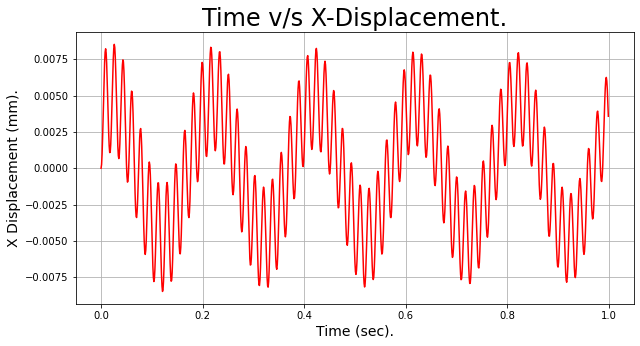

In [27]:
plt.figure(figsize = (10, 5))
plt.plot(time_vec, x, 'red')
plt.title('Time v/s X-Displacement.', fontdict = {'fontsize':24})
plt.xlabel('Time (sec).', fontdict = {'fontsize':14})
plt.ylabel('X Displacement (mm).', fontdict = {'fontsize':14})
plt.grid(True)
plt.show()

### Plot Z Displacement

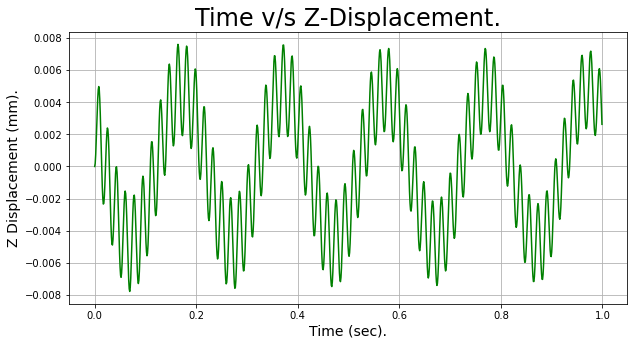

In [26]:
plt.figure(figsize = (10, 5))
plt.plot(time_vec, z, 'green')
plt.title('Time v/s Z-Displacement.', fontdict = {'fontsize':24})
plt.xlabel('Time (sec).', fontdict = {'fontsize':14})
plt.ylabel('Z Displacement (mm).', fontdict = {'fontsize':14})
plt.grid(True)
plt.show()

### Plot Theta Rotation

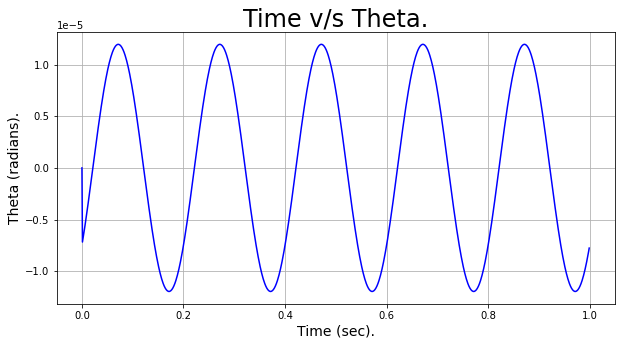

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(time_vec, theta, 'blue')
plt.title('Time v/s Theta.', fontdict = {'fontsize':24})
plt.xlabel('Time (sec).', fontdict = {'fontsize':14})
plt.ylabel('Theta (radians).', fontdict = {'fontsize':14})
plt.grid(True)
plt.show()

### Plot Psi Rotation

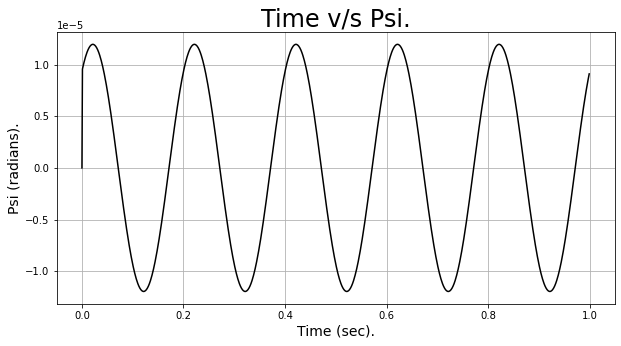

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(time_vec, psi, 'black')
plt.title('Time v/s Psi.', fontdict = {'fontsize':24})
plt.xlabel('Time (sec).', fontdict = {'fontsize':14})
plt.ylabel('Psi (radians).', fontdict = {'fontsize':14})
plt.grid(True)
plt.show()